$\color{darkblue}{\huge\text{Fourier}}$

<small><font color='blue'>Versión 1.0</font><small>

***
<!-- Color text:https://stackoverflow.com/questions/19746350/how-does-one-change-color-in-markdown-cells-ipython-jupyter-notebook/22333139 -->
    
<!-- Font Size:https://texblog.org/2012/08/29/changing-the-font-size-in-latex/ -->

<!-- #**Delta δ**


#**Teta θ**

#**Alfa α**

# **Beta β** -->

# Preliminars (Use of Python Notebooks - Colab)

En este curso aprenderemos a hacer análisis básico de series de tiempo fisiológicas usando Python.

Este *Jupyter notebook* contiene ejercicios comentados que ilustran el uso de algunas herramientas de numpy, scipy y matplotlib para visualizar y analizar series de tiempo. Como ejemplos usaremos series de tiempo fisiológicas reales obtenidas de fuentes diversas (con permiso).

## How to use this notebook

* Jupyter notebook es un intérprete interactivo de Python. 
* El notebook está separado en **celdas**.
* Cada celda puede contener código de Python (seleccionando **Code** en el *dropdown* en la barra herramientas) o texto normal con opciones de formato (seleccionando **Markdown**).

Para **ejecutar** una celda, posiciónate en ella con el mouse o el teclado, y oprime **CTRL + ENTER**. Esto ejecutará el código de Python que contiene o dará formato al texto que ingregaste usando Markdown.

Intenta ejecutar el siguiente código:

In [ ]:
print("FUCK fue ejecutado!!!")
# print("Hello World!!!")

FUCK fue ejecutado!!!


Debería haber aparecido el texto "FUCK fue ejecutado!!!" en la parte inferior de la celda.

### Shortcuts
* **SHIFT + ENTER** para ejecutar una celda, al terminar la ejecución quedarás en la celda siguiente.
* **CTRL + }** para comentar muchas lineas de codigo o texto.
* **CTRL + S** para **guardar** el estado actual del notebook. También puedes hacer clic en el ícono de guardar en la barra de herramientas o seleccionar "Save and Checkpoint" en el menú File.
* **Alt + Enter** to run the current cell and insert below.
* **CTRL + ´ or CTRL+¨** to ident lines 

## Import of Libraries

Muchas de las funcionalidades que usaremos son parte de las librerías de terceros **numpy**, **scipy** y **matplotlib** etc.

Para poder usarlas debemos primero importarlas al notebook. Ejecuta la siguiente celda (puede tardar la primera vez):

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import scipy.stats      
import scipy.optimize
import scipy.signal

In order to verify if the libraries were installed correct, lets run the next cell:

### Example:

In [ ]:
for module in ["numpy", "scipy", "matplotlib"]:
    try:
        __import__(module)
    except ImportError:
        print(">> %s no está instalado!" % module)
    else:
        print("%s instalado correctamente" % module)

numpy instalado correctamente
scipy instalado correctamente
matplotlib instalado correctamente


Si no aparece ningún mensaje de error es que han sido importadas con éxito. Usamos *as* para crear aliases cortos de los nombres de librerías; los aliases np y plt son usados muy frecuentemente.

### Latex & Extensions - Awesome Shit
* [Install Extensions](https://jupyterlab.readthedocs.io/en/stable/user/extensions.html)
* [Awesome Extensions](https://github.com/mauhai/awesome-jupyterlab)
* [Latex](https://oeis.org/wiki/List_of_LaTeX_mathematical_symbols)
* [Markdown Cells](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html)
* [Data Analysis:](https://nbviewer.jupyter.org/github/unpingco/Python-for-Signal-Processing/tree/master/)
* [Numpy Intro](https://www.youtube.com/watch?v=EEUXKG97YRw&feature=youtu.be)
* [Matplotlib Animation Tutorial](https://jakevdp.github.io/blog/2012/08/18/matplotlib-animation-tutorial/)
* [Jupyter Notebook Viewer](https://github.com/jupyter/nbviewer)

# Fourier Analysis

##  Análisis en el dominio de la frecuencia: la transformada de Fourier y el PSD

El análisis en el dominio de la frecuencia, también conocido como *análisis espectral*, estudia el contenido de frecuencia de los datos, es decir, estudia la importancia relativa de la variabilidad de la señal a diferentes escalas de tiempo. Esto se hace aplicando primero la transformación de Fourier a los datos, pasando la serie del espacio del tiempo al espacio de la frecuencia.

La herramienta principal es el **PSD** (o Power Spectral Density), también conocido como *espectro de potencia* (o *power spectrum*). Se define como:

$$ PSD \equiv \left| \mathscr{F}(x(t)) \right|^2 $$

donde $\mathscr{F}(x(t))$ es la *transformada de Fourier* de la serie de tiempo $x(t)$:

$$ \mathscr{F}(x(t)) \equiv \hat{x}(f) \equiv \int_{-\infty}^{\infty} x(t) e^{-2\pi i f t} dt$$

En principio, la transformada de Fourier nos da principalmente información sobre dos cosas:

* las **periodicidades**, visibles en forma de picos delgados a frecuencias determinadas
* caracteriza las **correlaciones en las fluctuaciones** de la serie
* https://es.wikipedia.org/wiki/Densidad_espectral
 
 **Wiener–Khinchin theorem**

* https://en.wikipedia.org/wiki/Wiener%E2%80%93Khinchin_theorem
* http://pdebuyl.be/blog/2017/wiener-khinchin.html (Python example)

# Practical Applying
Veamos esto con un ejemplo simple. Vamos a construir una serie de tiempo artificial sumando las siguientes componentes:
* un sin de amplitud = frecuencia 1 Hz
* un sin de amplitud = frecuencia 3 Hz
* un sin de amplitud = frecuencia 5 Hz
* rudio blanco gaussiano de amplitud 2

A continuación construimos esta señal:

In [2]:
# Import of Libraries
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import scipy.stats      
import scipy.optimize
import scipy.signal

In [ ]:
from numpy import sin, pi# Frecuencia de sampleo (N datos en 20 "segundos")

srate = 200     # 200 pts per second - sampling rate
ts = 1/srate    # 1/200 second - period rate
sec = 20        # window length in seconds
N = srate*sec   # Length of the signal
tiempo = np.linspace(0, sec, N) #time vector

# Amplitude y freq - cosine1
f1 = 1
A1 = 1 #/f1
s1 = A1*sin(2*pi*tiempo*f1)
# Amplitude y freq - cosine2
f2 = 3
A2 = 3 #1/f2
s2 = A2*sin(2*pi*tiempo*f2)
# Amplitude y freq - cosine3
f3 = 5
A3 = 5 #1/f3
s3 = A3*sin(2*pi*tiempo*f3)

#Normal Noise
mu=0;std=1;  #Mean = 0 , SDV = 1 --> Normal distribution
ruido = np.random.normal(mu,std,size=N)

## Time-Serie
serie = s1 + s2 + s3 + ruido

## Signal Plot

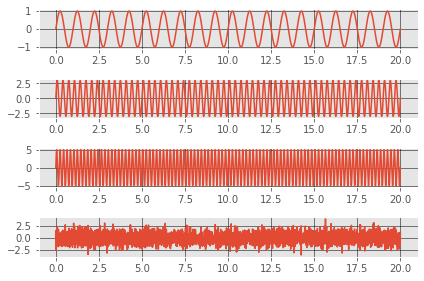

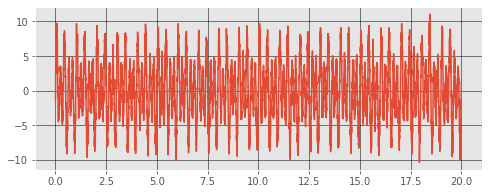

In [ ]:
plt.figure(num=1)
plt.clf()

with plt.style.context('ggplot'): #with plt.style.context('dark_background'):
    plt.subplot(4,1,1)
    plt.plot(tiempo, s1)
    plt.grid(color='k', linestyle='-', linewidth=0.5)

    plt.subplot(4,1,2)
    plt.plot(tiempo, s2)
    plt.grid(color='k', linestyle='-', linewidth=0.5)

    plt.subplot(4,1,3)
    plt.plot(tiempo, s3)
    plt.grid(color='k', linestyle='-', linewidth=0.5)

    plt.subplot(4,1,4)
    plt.plot(tiempo, ruido)
    plt.grid(color='k', linestyle='-', linewidth=0.5)

    plt.tight_layout()
    plt.figure(num=2, figsize=(8,3))
    plt.clf()
    plt.plot(tiempo, serie)
    plt.grid(color='k', linestyle='-', linewidth=0.5)
    plt.show()

## FFT Calculation

Ahora calculamos la transformada de Fourier via **np.fft.rfft()** y el PSD de la señal. El PSD suele graficarse en escala log-log. Esto se puede hacer usando **plt.loglog()** en vez de plt.plot(); la sintaxis es la misma.

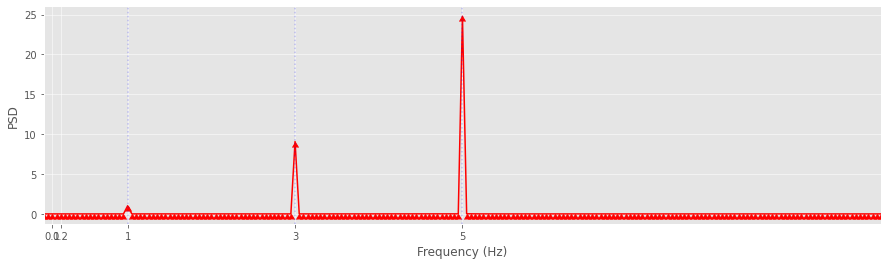

In [ ]:
# La transforma de Fourier (para una serie real)
fourier = np.fft.rfft(serie)
#print(fourier)

# El PSD es la norma cuadrada de la transf. de Fourier
power = np.abs(2*fourier/N)**2
# print(power)

# Construimos el vestor de freciencias
# Damos la longitud de la serie y time sampling ts (intervalo temporal entre puntos adquiridos)
freqs = np.fft.rfftfreq(len(serie), d=ts)

# Plot en escala log-log
plt.figure(num=3, figsize=(15,4))
plt.clf()

with plt.style.context('ggplot'):
# with plt.style.context('dark_background'):
    plt.plot(freqs, power, marker=6,color="r")
    #plt.semilogy(freqs, power)
    #plt.loglog(freqs, power)
    plt.xlim(freqs[0], 10)
    #plt.ylim(1e-3,1e9)
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("PSD")
    plt.grid(color='w', linestyle='-', linewidth=0.5)
    
    # Marcamos con líneas verticales las frecuencias de los cosenos
    plt.axvline(f1, ls=":", color="b", alpha=0.2)
    plt.axvline(f2, ls=":", color="b", alpha=0.2)
    plt.axvline(f3, ls=":", color="b", alpha=0.2)

    # Truco para agregar ticks arbitrarios al eje x además de los default
    plt.xticks([1e-1, 0.2, 1, 3, 5])
    from matplotlib.ticker import FormatStrFormatter
    plt.gca().xaxis.set_major_formatter(FormatStrFormatter("%g"))
plt.show()

## Aliasing


In [15]:
from numpy import sin, pi# Frecuencia de sampleo (N datos en 20 "segundos")

srate = 200     # 200 pts per second - sampling rate
ts = 1/srate    # 1/200 second - period rate
sec = 20        # window length in seconds
N = srate*sec   # Length of the signal
tiempo = np.linspace(0, sec, N) #time vector

# Amplitude y freq - cosine1
f1 = 90
A1 = 10
s1 = A1*sin(2*pi*tiempo*f1)
# Amplitude y freq - cosine2
f2 = 110
A2 = 10
s2 = A2*sin(2*pi*tiempo*f2)
 

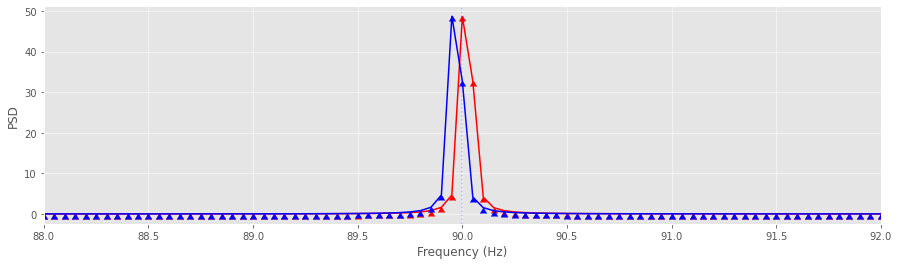

In [18]:
# La transforma de Fourier (para una serie real)
fourier1 = np.fft.rfft(s1)
fourier2 = np.fft.rfft(s2)
#print(fourier)

# El PSD es la norma cuadrada de la transf. de Fourier
power1 = np.abs(2*fourier1/N)**2
power2 = np.abs(2*fourier2/N)**2

# print(power)

# Construimos el vestor de freciencias
# Damos la longitud de la serie y time sampling ts (intervalo temporal entre puntos adquiridos)
freqs1 = np.fft.rfftfreq(len(s1), d=ts)
freqs2 = np.fft.rfftfreq(len(s2), d=ts)

# Plot en escala log-log
plt.figure(num=3, figsize=(15,4))
plt.clf()

with plt.style.context('ggplot'):
# with plt.style.context('dark_background'):  
    plt.plot(freqs1, power1, marker=6,color="r")
    plt.plot(freqs2, power2, marker=6,color="b")
    #plt.semilogy(freqs, power)
    #plt.loglog(freqs, power)
    plt.xlim(88, 92)
    # plt.xlim(freqs[0], srate/2)
    # plt.ylim(20)
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("PSD")
    plt.grid(color='w', linestyle='-', linewidth=0.5)
    
    

    # Marcamos con líneas verticales las frecuencias de los cosenos
    plt.axvline(f1, ls=":", color="b", alpha=0.2)
    plt.axvline(f2, ls=":", color="b", alpha=0.2)
    plt.axvline(f3, ls=":", color="b", alpha=0.2)

    # Truco para agregar ticks arbitrarios al eje x además de los default
    # plt.xticks([0, 20, 50, 100])
    # from matplotlib.ticker import FormatStrFormatter
    # plt.gca().xaxis.set_major_formatter(FormatStrFormatter("%g"))
plt.show()

## Window Effect

In [35]:
from numpy import sin, pi# Frecuencia de sampleo (N datos en 20 "segundos")

srate = 200     # 200 pts per second - sampling rate
ts = 1/srate    # 1/200 second - period rate
sec = 5        # window length in seconds
N = srate*sec   # Length of the signal
tiempo = np.linspace(0, sec, N) #time vector

sec2 = 10          # window length in seconds
N2 = srate*sec2   # Length of the signal
tiempo2 = np.linspace(0, sec2, N2) #time vector

sec3 = 20          # window length in seconds
N3 = srate*sec3   # Length of the signal
tiempo3 = np.linspace(0, sec3, N3) #time vector

# Amplitude y freq
f1 = 90
A1 = 1
# Signals
s1 = A1*sin(2*pi*tiempo*f1)
s2 = A1*sin(2*pi*tiempo2*f1)
s3 = A1*sin(2*pi*tiempo3*f1)

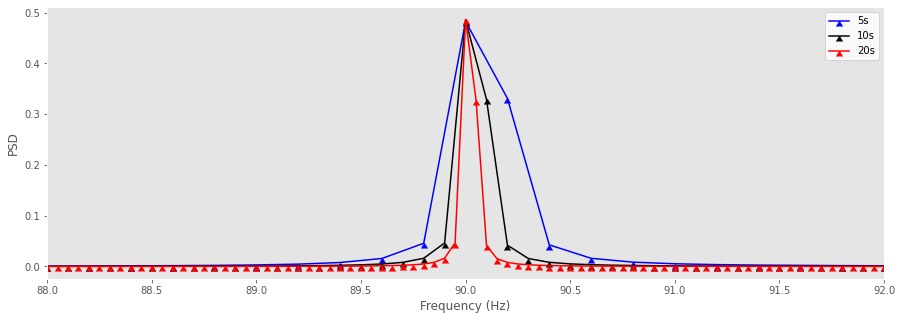

In [38]:
# La transforma de Fourier (para una serie real)
fourier1 = np.fft.rfft(s1)
fourier2 = np.fft.rfft(s2)
fourier3 = np.fft.rfft(s3)

# El PSD es la norma cuadrada de la transf. de Fourier
power1 = np.abs(2*fourier1/N)**2
power2 = np.abs(2*fourier2/N2)**2
power3 = np.abs(2*fourier3/N3)**2
# Construimos el vestor de freciencias
freqs1 = np.fft.rfftfreq(len(s1), d=ts)
freqs2 = np.fft.rfftfreq(len(s2), d=ts)
freqs3 = np.fft.rfftfreq(len(s3), d=ts)

plt.figure(num=1, figsize=(15,5))
with plt.style.context('ggplot'):    
    plt.plot(freqs1, power1, marker=6,color="b")
    plt.plot(freqs2, power2, marker=6,color="k")
    plt.plot(freqs3, power3, marker=6,color="r")
    # plt.semilogy(freqs, power, marker=6,color="r")
    # plt.semilogy(freqs, power2, marker=6,color="b")
    #plt.loglog(freqs, power)
    plt.xlim(88, 92)
    # plt.ylim(20)
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("PSD")
    plt.grid(color='w', linestyle='-', linewidth=0.5)
    
    # Truco para agregar ticks arbitrarios al eje x además de los default
    # plt.xticks([47,52])
    # from matplotlib.ticker import FormatStrFormatter
    # plt.gca().xaxis.set_major_formatter(FormatStrFormatter("%g"))
plt.legend(['5s','10s', '20s'])    
plt.grid()
plt.show()


## Freq Effect

In [115]:
from numpy import sin, pi# Frecuencia de sampleo (N datos en 20 "segundos")

srate = 200     # 200 pts per second - sampling rate
ts = 1/srate    # 1/200 second - period rate
sec = 3        # window length in seconds
N = srate*sec   # Length of the signal
tiempo = np.linspace(0, sec, N) #time vector


# Amplitude y freq
f1 = 90
f2 = 89.5
A1 = 1
A2 = 1
# Signals
s1 = A1*sin(2*pi*tiempo*f1)
s2 = A2*sin(2*pi*tiempo*f2)
s = s1 +s2

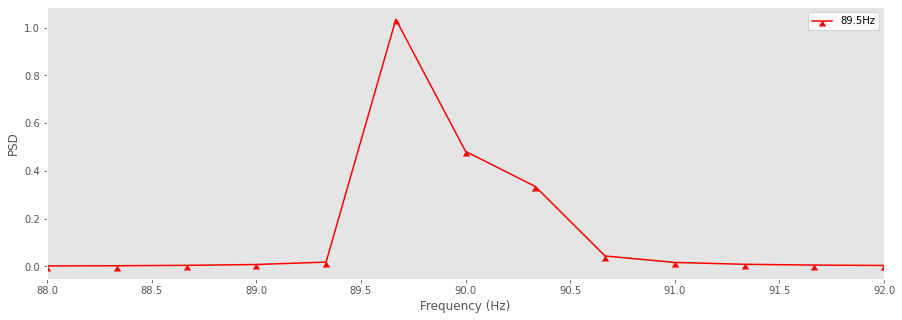

In [116]:
# La transforma de Fourier (para una serie real)
fourier1 = np.fft.rfft(s)
# El PSD es la norma cuadrada de la transf. de Fourier
power1 = np.abs(2*fourier1/N)**2
# Construimos el vector de freciencias
freqs1 = np.fft.rfftfreq(len(s1), d=ts)

plt.figure(num=1, figsize=(15,5))
with plt.style.context('ggplot'):    
    plt.plot(freqs1, power1, marker=6,color="r")
    # plt.semilogy(freqs, power, marker=6,color="r")
    # plt.semilogy(freqs, power2, marker=6,color="b")
    #plt.loglog(freqs, power)
    plt.xlim(88, 92)
    # plt.ylim(20)
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("PSD")
    plt.grid(color='w', linestyle='-', linewidth=0.5)
    
    # Truco para agregar ticks arbitrarios al eje x además de los default
    # plt.xticks([47,52])
    # from matplotlib.ticker import FormatStrFormatter
    # plt.gca().xaxis.set_major_formatter(FormatStrFormatter("%g"))
plt.legend(['89.5Hz','90Hz'])    
plt.grid()
plt.show()


## Type of Windows

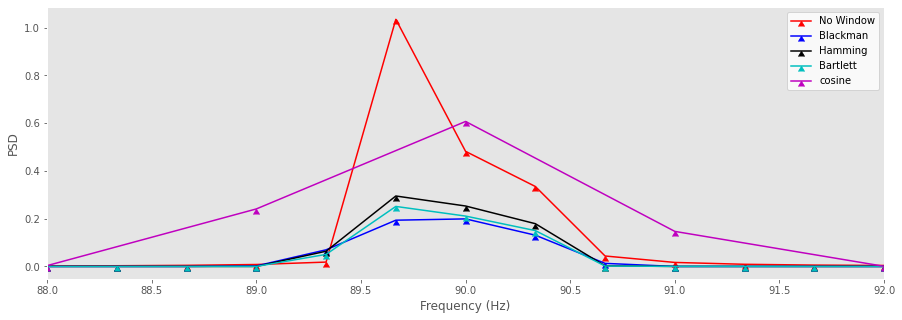

In [121]:
from scipy import signal
from scipy.signal import blackman
w1 = blackman(N)
w2 = np.hamming(N)
w3 = np.bartlett(N)
f, Pxx_den = signal.welch(s, srate,window='hann',nperseg=200) #Welch

# La transforma de Fourier (para una serie real)
fourier = np.fft.rfft(s)
fourier1 = np.fft.rfft(s*w1)
fourier2 = np.fft.rfft(s*w2)
fourier3 = np.fft.rfft(s*w3)

# El PSD es la norma cuadrada de la transf. de Fourier
power = np.abs(2*fourier/N)**2
power1 = np.abs(2*fourier1/N)**2
power2 = np.abs(2*fourier2/N)**2
power3 = np.abs(2*fourier3/N)**2

# Construimos el vector de freciencias
freqs = np.fft.rfftfreq(len(s1), d=ts)

plt.figure(num=1, figsize=(15,5))
with plt.style.context('ggplot'):
    plt.plot(freqs, power, marker=6,color="r")
    plt.plot(freqs, power1, marker=6,color="b")
    plt.plot(freqs, power2, marker=6,color="k")
    plt.plot(freqs, power3, marker=6,color="c")
    plt.plot(f, Pxx_den, marker=6,color="m")

    # plt.semilogy(freqs, power, marker=6,color="r")
    # plt.semilogy(freqs, power2, marker=6,color="b")
    #plt.loglog(freqs, power)
    plt.xlim(88, 92)
    # plt.ylim(20)
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("PSD")
    plt.grid(color='w', linestyle='-', linewidth=0.5)
    
    # Truco para agregar ticks arbitrarios al eje x además de los default
    # plt.xticks([47,52])
    # from matplotlib.ticker import FormatStrFormatter
    # plt.gca().xaxis.set_major_formatter(FormatStrFormatter("%g"))
plt.legend(['No Window','Blackman','Hamming','Bartlett','cosine'])    
plt.grid()
plt.show()


## Ruido de Colores (Autocorrelación)

Además de revelar periodicidades, el PSD también habla del tipo de **correlaciones** existentes en las **fluctuaciones** (el "ruido"). Los ruidos *invariantes de escala* son particularmente importantes y se identifican cuando el PSD cumple una ley de potencia de la frecuencia: $P \propto f^{-\beta}$.

Este **exponente de escalamiento $\beta$** cuantifica la correlación en las fluctuaciones y el tipo de ruido:
* $\beta = 0$ indicando *ruido blanco* (aleatorio)
* $\beta = 2$ *ruido Browniano* (muy correlacionado)
* $\beta \approx 1$, llamado *ruido 1/f* o *ruido rosa*, indica un balance entre estos extremos, el cual se piensa es característico del balance dinámico óptimo en muchos sistemas biológicos (e.g. Musha 1981).

Veamos cómo se ven estos tres tipos de ruido:

In [ ]:
# Import library for generate noise color
!pip install colorednoise
import colorednoise as cn
from matplotlib import pylab as plt


In [ ]:
#input values
beta0 = 0         # the exponent: 0=white noite; 1=pink noise;  2=red noise (also "brownian noise")
beta1 = 1
beta2 = 2
Nsize = 2**16  # number of samples to generate (time series extension)

#Deffing some colores
white = cn.powerlaw_psd_gaussian(beta0, Nsize)
noise1f = cn.powerlaw_psd_gaussian(beta1, Nsize)
brownian = cn.powerlaw_psd_gaussian(beta2, Nsize)

print(np.size(white),np.size(noise1f),np.size(brownian))

65536 65536 65536


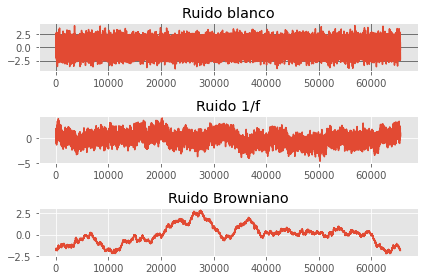

In [ ]:
# # Ruido blanco gaussiano
# blanco = np.random.normal(size=1000)
# # Este no es tan fácil de generar!
# ruido1f = np.loadtxt("datos/ruido1f.txt")
# Nsize = np.size(ruido1f)

# # El caminante aleatorio, o la suma de ruido blanco
# browniano = np.cumsum(blanco)

plt.figure(1)
plt.clf()


with plt.style.context('ggplot'): #with plt.style
  plt.subplot(3,1,1)
  plt.plot(white)
  plt.grid(color='k', linestyle='-', linewidth=0.5)
  plt.title("Ruido blanco")

  plt.subplot(3,1,2)
  plt.plot(noise1f)
  plt.title("Ruido 1/f")

  plt.subplot(3,1,3)
  plt.plot(brownian)
  plt.title("Ruido Browniano")

plt.tight_layout()
plt.show()

El PSD de estas series de tiempos se ve así:

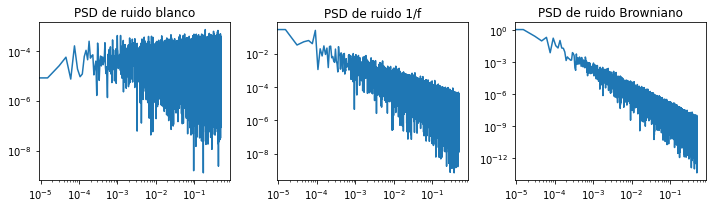

In [ ]:
plt.figure(2, figsize=(10,3))
plt.clf()

i = 1
for ruido in [white, noise1f, brownian]:

    plt.subplot(1,3,i)

    power = np.abs(2*np.fft.rfft(ruido)/Nsize)**2
    freqs = np.fft.rfftfreq(len(ruido))
    
    plt.loglog(freqs, power)
    
    if i == 1:
        plt.title("PSD de ruido blanco")
        #plt.ylim(1e-3, 1e6)
    elif i == 2:
        plt.title("PSD de ruido 1/f")
        #plt.ylim(1e-5, 1e4)
    elif i == 3:
        plt.title("PSD de ruido Browniano")
        #plt.ylim(1e0, 1e9)        
    i += 1
plt.tight_layout()
plt.show()

Para estimar el exponente $\beta$ debemos ajustar una ley de potencia al PSD, es decir, encontrar $P_0$ y $\beta$ tales que $P = P_0 \times f^{-\beta}$. Si tomamos el logaritmo de esta ecuación, se tiene $\log(P) = \log(P_0) - \beta \cdot \log(f)$. Vemos que $-\beta$ es la pendiente de la recta en espacio log-log, y podemos entonces obtenerla directamente haciendo una regresión al logaritmo del PSD.

Usemos scipy.stats.linregress() para obtener la recta de mejor ajuste al espectro logarítmico, y así obtener $\beta$:

In [ ]:
# Esta función recibe las frecuencias y la potencia de un PSD, 
# y devuelve beta y P0 la ley de potencia de mejor ajuste,
# P \propto P0 * f^{-\beta}
def ajustar_powerlaw(frecuencias, potencia):
    logfreq = np.log(frecuencias)
    logpot = np.log(potencia)
    slope, intercept, rvalue, pvalue, stderr = scipy.stats.linregress(logfreq, logpot)
    beta = -slope
    P0 = np.exp(intercept)
    return (beta, P0)

Agreguemos la línea de ajuste a estos PSDs para comprobar que $\beta$ es el esperado:

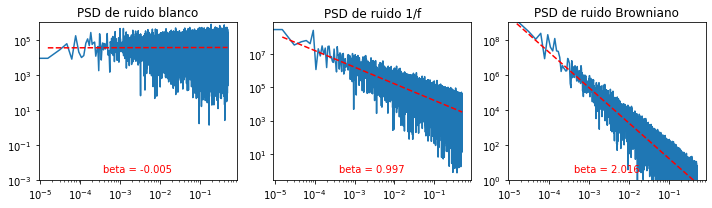

In [ ]:
plt.figure(2, figsize=(10,3))
plt.clf()

i = 1
for ruido in [white, noise1f, brownian]:

    plt.subplot(1,3,i)

    power = np.abs(np.fft.rfft(ruido))**2
    freqs = np.fft.rfftfreq(len(ruido))
    
    # Quitamos el primer valor del PSD porque tiene frecuencia cero
    beta, P0 = ajustar_powerlaw(freqs[1:], power[1:])
    
    plt.loglog(freqs, power)
    plt.loglog(freqs[1:], P0*freqs[1:]**(-beta), "r--")    
    
    if i == 1:
        plt.title("PSD de ruido blanco")
        plt.ylim(1e-3, 1e6)
    elif i == 2:
        plt.title("PSD de ruido 1/f")
        # plt.ylim(1e-5, 1e4)
    elif i == 3:
        plt.title("PSD de ruido Browniano")
        plt.ylim(1e0, 1e9)

    plt.text(0.5, 0.05, "beta = %.3f" % beta, ha="center", color="r", transform=plt.gca().transAxes)        
        
    i += 1

plt.tight_layout()
plt.show()